# Simulations of the semi-discrete prey-predator models

This notebook aims to be easily executable, by entring the parameters once for all, without disjunctions of cases, for each model. If we want to see other conditions, we only need to change the parameters at the top of the notebook.

In [31]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import models
importlib.reload(models)

<module 'models' from 'c:\\Users\\ainat\\Internship_CACOLAC\\sim_models\\First_sim_CACOLAC\\models.py'>

In [32]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 
a = 3
c = 20
m = 0.1
gamma = 0.8
b = 5
q = 0.1

mu = 5
T = 5

t_0 = 0
t_n = 50

In [33]:
y_star = (1/2) * ( mu*T - (m/q) + np.sqrt( (mu*T - (m/q))**2 + (4*mu*m*T) /( q*(1-np.exp(-m*T))) ) )

In [34]:
#This cell is to eventually check if some stabilities conditions are satisfied. 
#If needed, the functions calculate_mu_a, calculate_mu_b and calculate_mu_q can be used

##No interference model
if mu > models.calculate_mu_a(r=r, K=K, a=a, c=c, m=m):
    print('GAS conditions for no interference model are satisfied')
else:
    print('GAS conditions for no interference model are NOT satisfied')

##BDA model
if r >= a/b:
    print('r needs to be increased to expect GAS')
else:
    if mu > models.calculate_mu_b(r=r, K=K, a=a, c=c, m=m, b=b, T=T): 
        print('GAS conditions for BDA are satisfied')  
    else:
        print('GAS conditions for BDA model are NOT satisfied')

##Squabbling model
if mu > models.calculate_mu_q(r=r, K=K, a=a, c=c, m=m, q=q):
    print('GAS conditions for squabbling are satisfied')
else:
    print('GAS conditions for squabbling are NOT satisfied')

GAS conditions for no interference model are satisfied
GAS conditions for BDA are satisfied
GAS conditions for squabbling are satisfied


In [35]:
#Other initial values but the periodic solution
x0_a = 1 
y0_a = 3
x0y0_a = [x0_a, y0_a]

x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

## 1. Model without interference

Other initial values but the periodic solution

In [36]:
xy_a = models.solve_no_int_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]


xy_f = models.solve_no_int_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_f = xy_f[0]
y_f = xy_f[1]


xy_i = models.solve_no_int_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_i = xy_i[0]
y_i = xy_i[1]

#time points
t = xy_a[2]

Periodic solution

In [37]:
x_p = np.zeros_like(t)
y_p = models.y_p_no_int(t, r, K, a, c, m, gamma, mu, T)

Plot results

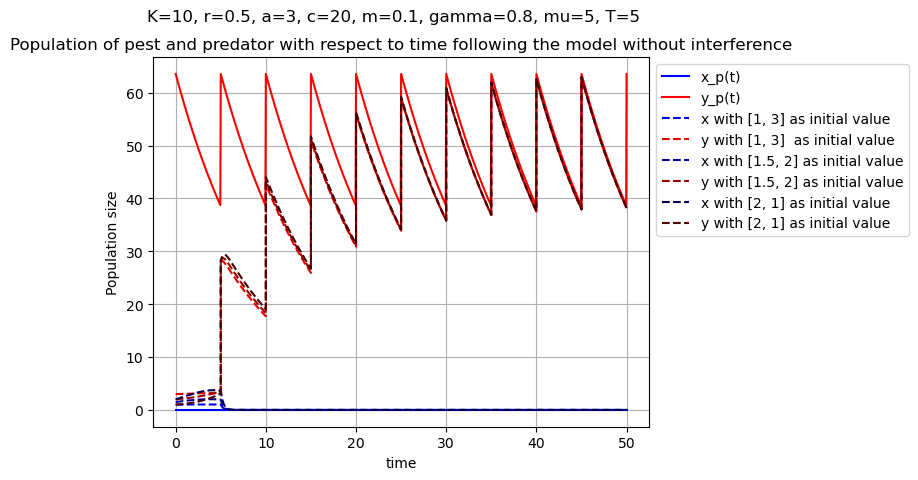

In [38]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_f, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_f} as initial value')
plt.plot(t, y_f, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_f} as initial value')
plt.plot(t, x_i, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_i} as initial value')
plt.plot(t, y_i, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_i} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the model without interference')
plt.suptitle(f'{K=}, {r=}, {a=}, {c=}, {m=}, {gamma=}, {mu=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 2. Beddington-DeAngelis model

Other initial conditions but the periodic solution

In [39]:
xy_a = models.solve_bda_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]


xy_f = models.solve_bda_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_f = xy_f[0]
y_f = xy_f[1]


xy_i = models.solve_bda_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_i = xy_i[0]
y_i = xy_i[1]

#time points
t = xy_a[2]

Periodic solution

In [40]:
x_p = np.zeros_like(t)
y_p = models.y_p_bda(t, r, K, a, c, b, m, gamma, mu, T)

Plot results

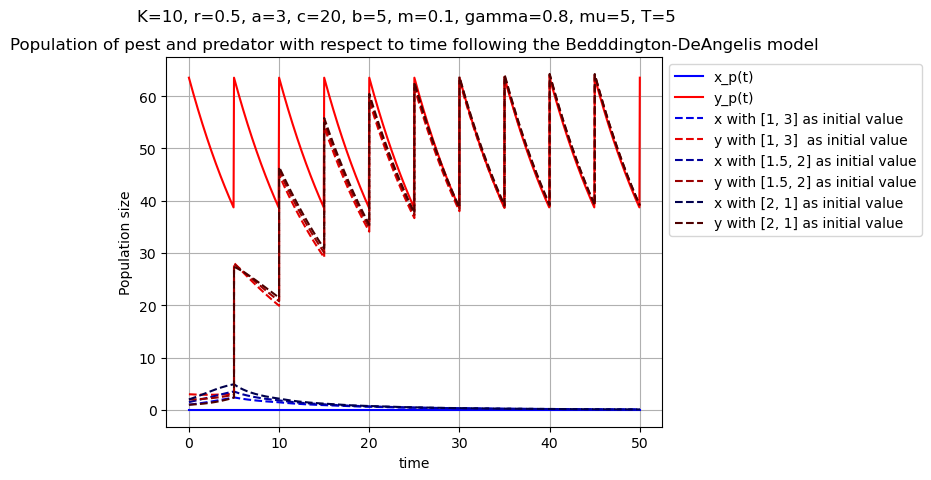

In [41]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_f, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_f} as initial value')
plt.plot(t, y_f, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_f} as initial value')
plt.plot(t, x_i, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_i} as initial value')
plt.plot(t, y_i, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_i} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the Bedddington-DeAngelis model')
plt.suptitle(f'{K=}, {r=}, {a=}, {c=}, {b=}, {m=}, {gamma=}, {mu=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 3.Squabbling model

To be efficient, choose a small T

Initial conditions

In [42]:
xy_a = models.solve_s_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]


xy_f = models.solve_s_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_f = xy_f[0]
y_f = xy_f[1]


xy_i = models.solve_s_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_i = xy_i[0]
y_i = xy_i[1]

#time points
t = xy_a[2]

Periodic solution 

In [43]:
x_p = np.zeros_like(t)
y_p = models.y_p_s(t=np.array(t), r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T)

Plot results

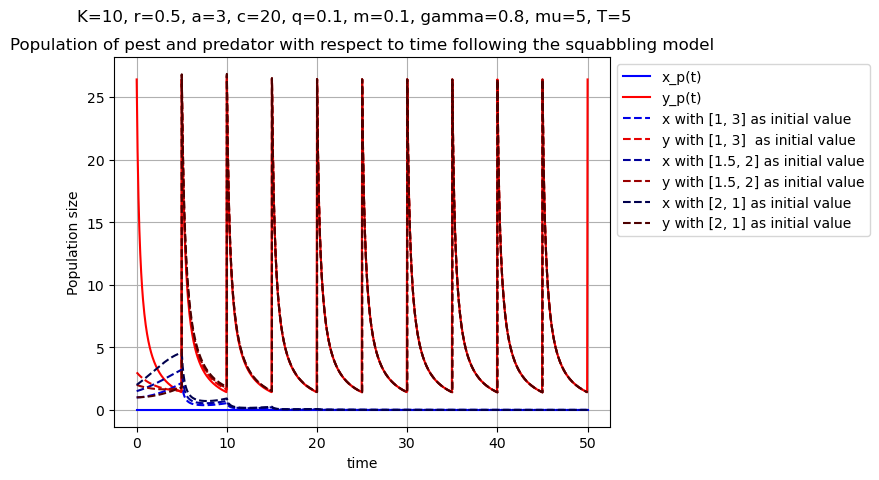

In [44]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_f, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_f} as initial value')
plt.plot(t, y_f, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_f} as initial value')
plt.plot(t, x_i, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_i} as initial value')
plt.plot(t, y_i, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_i} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the squabbling model')
plt.suptitle(f'{K=}, {r=}, {a=}, {c=}, {q=}, {m=}, {gamma=}, {mu=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()